In [1]:
#imports

#numpy, pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
alpha = 0.7
%matplotlib inline

#regex
import re

In [2]:
#get titanic train & test csv files as a Dataframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#preview the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()
print('-------------------------------')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
F

In [4]:
print(df_train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


# 1.Look closely to the train data

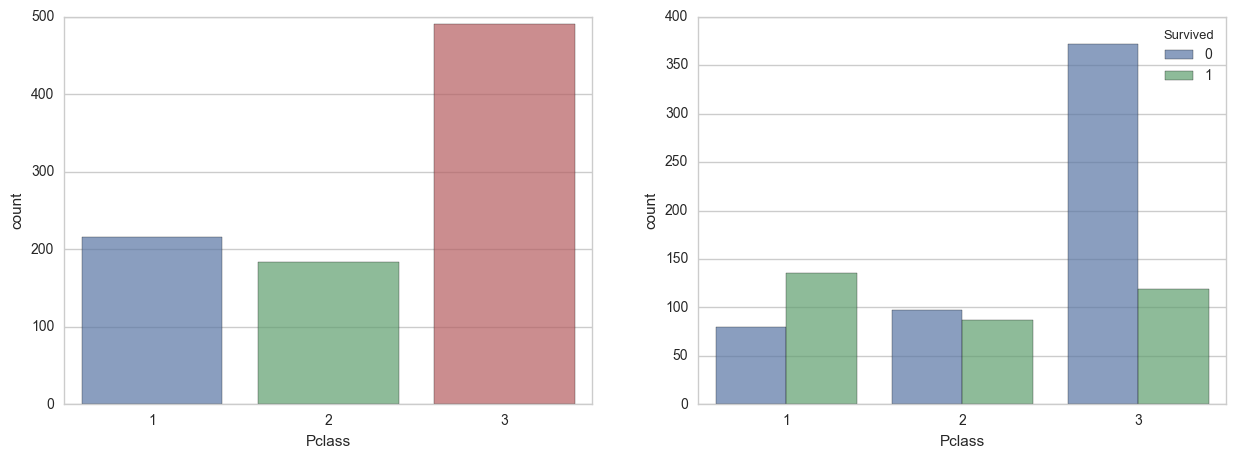

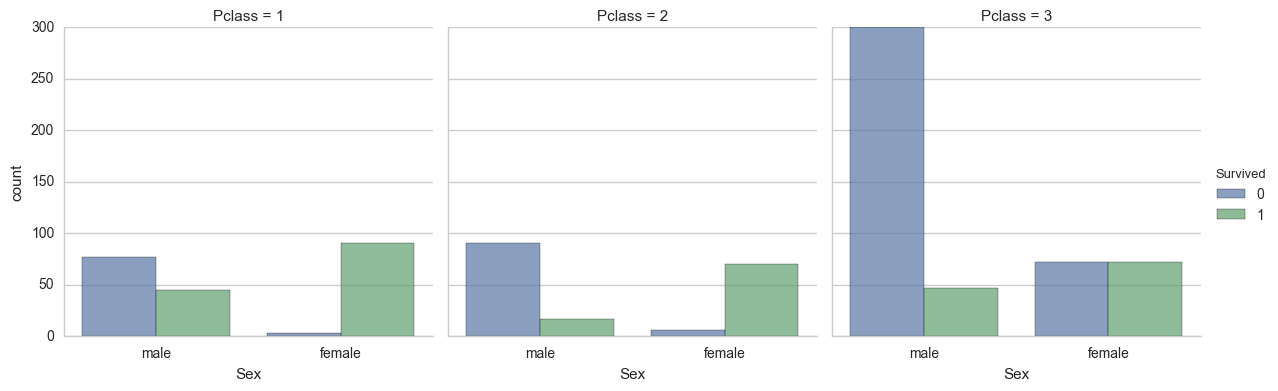

In [5]:
#社会等级越高，幸存的比例就越大，且女性具有更高的幸存几率

fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.countplot('Pclass', data = df_train, alpha = alpha, ax = ax[0])
sns.countplot('Pclass', hue = 'Survived', data = df_train, alpha = alpha, ax = ax[1])

sns.factorplot('Sex', hue = 'Survived', col = 'Pclass', data = df_train, kind = 'count', alpha = alpha)

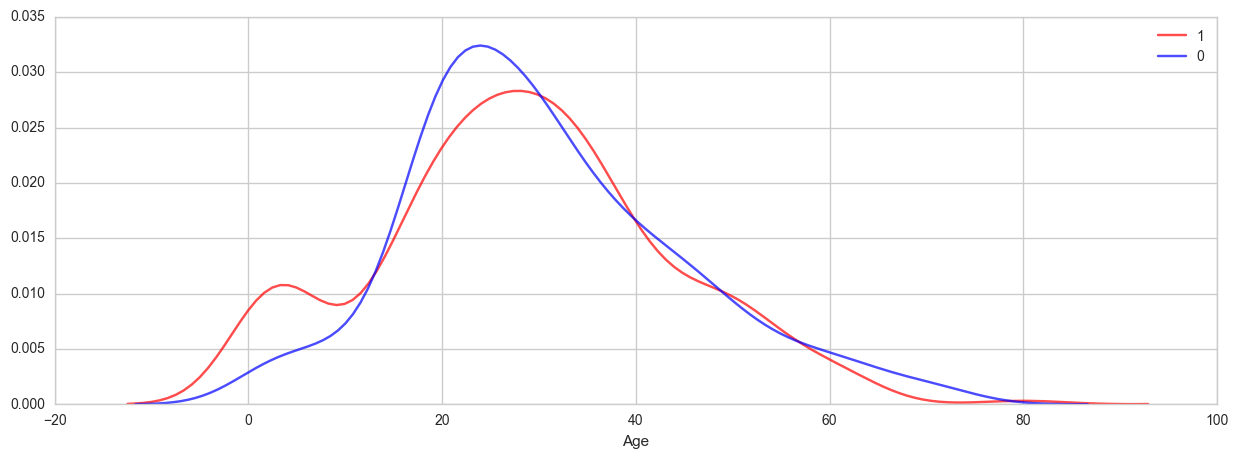

In [6]:
#年龄小于10岁的儿童获救的密度较大

fig, ax = plt.subplots(figsize = (15, 5))
sns.kdeplot(df_train.Age[df_train.Survived == 1], color = 'r', ax = ax, alpha = alpha, label = '1')
sns.kdeplot(df_train.Age[df_train.Survived == 0], color = 'b', ax = ax, alpha = alpha, label = '0')
ax.set_xlabel('Age')

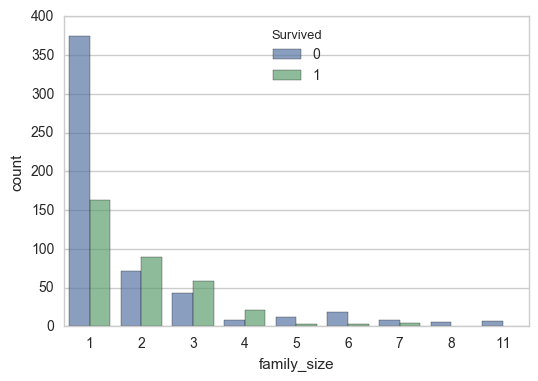

In [7]:
#家庭人数在2~4个的情况下存活概率较死亡概率要来得高

df_train['family_size'] = df_train.SibSp + df_train.Parch + 1
sns.countplot('family_size', hue = 'Survived', data = df_train, alpha = alpha)

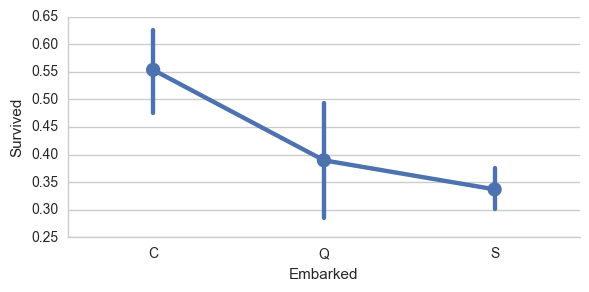

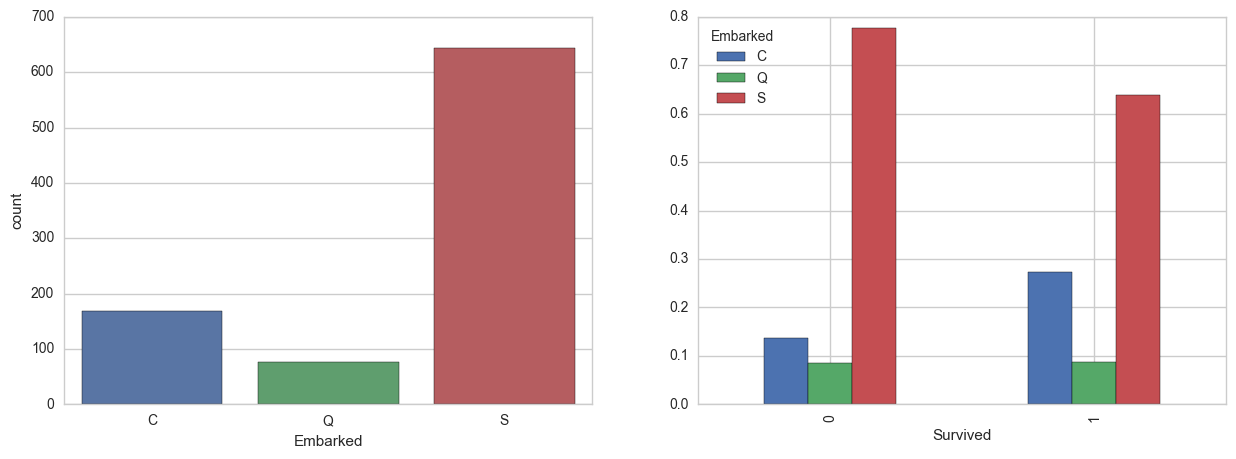

In [8]:
#从Cherbourg上船的人具有较高幸存几率

#plot
sns.factorplot('Embarked', 'Survived', data = df_train, size=3, aspect=2, order = ['C', 'Q', 'S'])

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot('Embarked', data = df_train, order = ['C', 'Q', 'S'], ax = ax[0])
survived_embarked_cross = pd.crosstab(df_train.Survived, df_train.Embarked)
survived_embarked_cross.div(survived_embarked_cross.sum(1).astype(float), axis = 0).plot(kind = 'bar',\
                                                                                         ax = ax[1])

# 2.Deal with the missing values

In [9]:
print(df_train.isnull().sum())
print('-------------------------------')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64
-------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Missing values on Embarked

In [10]:
#可以观察出这两个乘客来自于相同的人群（same Pclass），最主要的是票价（same Fare）也正好相同
#因此估计她们从同一个地方上的船

df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


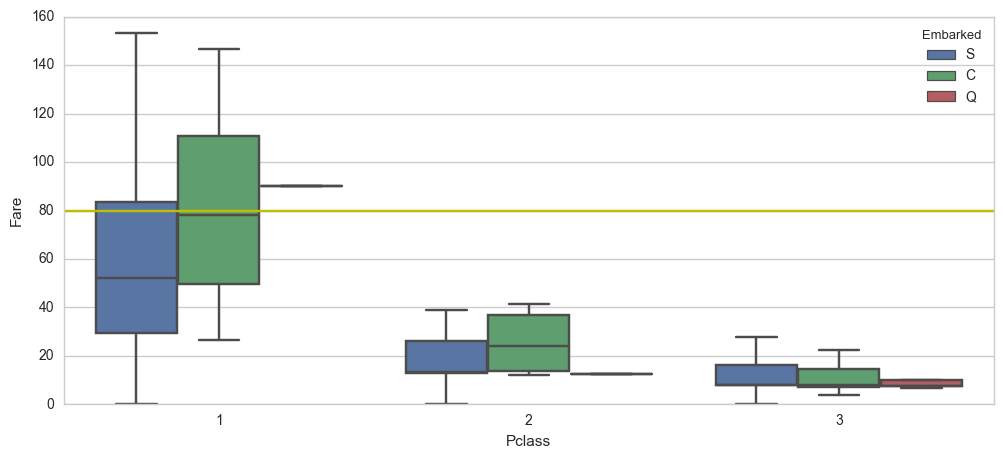

In [11]:
#从boxplot中可以看到两个缺失值应该填上‘C’，因为大多数Pclass为1，Fare为80的人都来自于‘C’

#plot
fig, ax = plt.subplots(figsize = (12, 5))
sns.boxplot('Pclass', 'Fare', hue = 'Embarked', data = df_train, showfliers = False, ax = ax)
ax.axhline(y = 80, color = 'y')

#fillna
df_train.Embarked.fillna('C', inplace = True)

##  Missing value on Fare

In [12]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


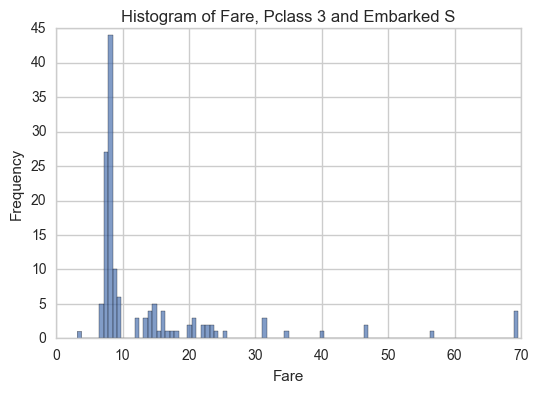

In [13]:
#plot
fig, ax = plt.subplots()
df_test.Fare[(df_test.Pclass == 3) & (df_test.Embarked == 'S')].hist(bins = 100, ax = ax, alpha = alpha)
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fare, Pclass 3 and Embarked S')

In [14]:
df_test.Fare[(df_test.Pclass == 3) & (df_test.Embarked == 'S')].median()

8.05

In [15]:
df_test.Fare.fillna(8.05, inplace = True)

## Missing value on Cabin

In [16]:
#由于缺失量太大，直接剔除

#df_train.drop('Cabin', axis = 1, inplace = True)
#df_test.drop('Cabin', axis = 1, inplace = True)

# 3.Feature Engineering

In [17]:
df_full = pd.concat([df_train, df_test], ignore_index = True)

## create a feature, Title

In [18]:
df_full['title'] = df_full.Name.map(lambda x: re.compile(',\s(.*?)\.').findall(x)[0])
df_full.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: title, dtype: int64

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


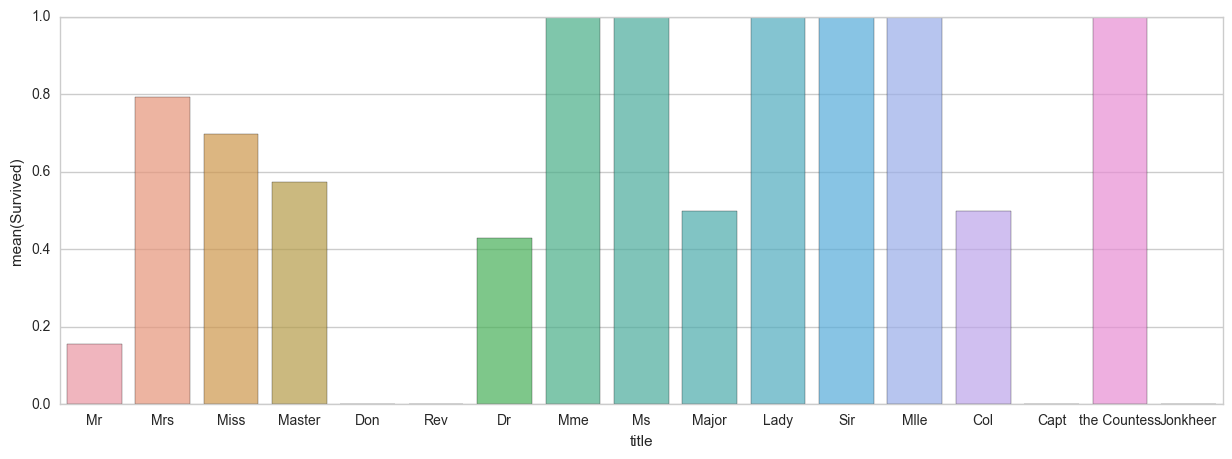

In [19]:
#观察各个头衔（title）的幸存率,并重新分为几个较少的类别

#plot
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot('title','Survived', ci = None, data = df_full[- df_full.Survived.isnull()], alpha = alpha, ax = ax)

#rename
df_full.title[df_full.title.isin(['Ms', 'Mlle'])] = 'Miss'
df_full.title[df_full.title == 'Mme'] = 'Mrs'
df_full.title[df_full.title.isin([ 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', \
                                  'the Countess', 'Jonkheer', 'Dona'])] = 'rare title'

## create a feature, deck

In [20]:
deck = df_full[- df_full.Cabin.isnull()].Cabin.map(lambda x: re.compile('[A-Z]').findall(x)[0])
_ = df_full.set_value(df_full.index, 'Deck', deck)
del deck
df_full.Deck.fillna('Unknow', inplace = True)

## create a feature, family_num

In [21]:
df_full['family_num'] = df_full.SibSp + df_full.Parch + 1

##  create a feature, family_size

In [22]:
df_full['family_size'] = 'M'
_ = df_full.set_value(df_full.family_num < 2, 'family_size', 'S')
_ = df_full.set_value(df_full.family_num > 4, 'family_size', 'L')

## predict Age

In [23]:
df_full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,title,Deck,family_num
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr,Unknow,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,M,Mrs,C,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,S,Miss,Unknow,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,M,Mrs,C,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,S,Mr,Unknow,1


In [24]:
from sklearn.preprocessing import StandardScaler
fare_scaler = StandardScaler()
df_full['Norm_fare'] = Series(fare_scaler.fit_transform(df_full.Fare.reshape(-1, 1)).reshape(-1))

In [25]:
df_full = pd.get_dummies(df_full, columns = ['Embarked', 'Pclass',  'title', 'Deck', 'family_size'])
df_full.drop(['Cabin', 'Fare', 'Name', 'PassengerId', 'Ticket', 'family_num'], axis = 1, inplace = True)
df_full.Sex = np.where(df_full.Sex == 'male', 1, 0)

In [26]:
df_full.head()

,Age,Parch,Sex,SibSp,Survived,Norm_fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknow,family_size_L,family_size_M,family_size_S
0,22.0,0,1,1,0.0,-0.503176,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,38.0,0,0,1,1.0,0.734809,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,0,0,0,1.0,-0.490126,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,0,0,1,1.0,0.383263,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,1,0,0.0,-0.487709,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
X = df_full[-df_full.Age.isnull()].drop('Age', axis = 1)
y = df_full[-df_full.Age.isnull()].Age

In [28]:
from sklearn.grid_search import GridSearchCV
def get_model(estimator, parameters, X_train, y_train, scoring = None):
    model = GridSearchCV(estimator, parameters, scoring = scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [29]:
import xgboost as xgb

XGB = xgb.XGBRegressor(seed = 1031)
paramaeters = {'reg_alpha': np.linspace(.1, 1., 5), 'reg_lambda': np.linspace(.1, 3., 5)}

best_age_XGB_model = get_model(XGB, paramaeters, X, y)
age_predict = best_age_XGB_model.predict(df_full[df_full.Age.isnull()].drop('Age', axis = 1))

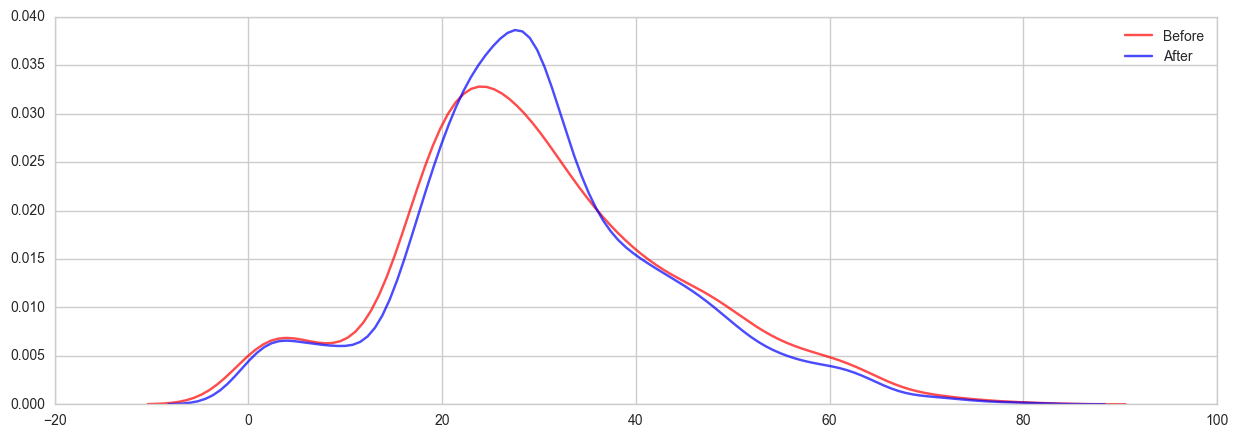

In [30]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.kdeplot(df_full.Age, color = 'r', ax = ax, alpha = alpha, label = 'Before')
_ = df_full.set_value(df_full.Age.isnull(), 'Age', age_predict)
sns.kdeplot(df_full.Age, color = 'b', ax = ax, alpha = alpha, label = 'After')

# 4.Build model

In [90]:
from sklearn import externals

In [31]:
age_scaler = StandardScaler()
df_full['Norm_age'] = Series(age_scaler.fit_transform(df_full.Age.reshape(-1, 1)).reshape(-1))
df_full.drop('Age', axis = 1, inplace=True)

In [36]:
from sklearn.cross_validation import train_test_split
X = df_full[:891].drop('Survived', axis = 1)
y = df_full[:891].Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1031)
X_to_predict = df_full[891:].drop('Survived', axis = 1)

In [33]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize = (10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
paramaeters = {'n_neighbors':[3, 4, 5], 'p': [1, 2]}

clf_knn_trian = get_model(KNN, paramaeters, X_train, y_train)

0.793721973094
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=1,
           weights='uniform')


<module 'matplotlib.pyplot' from 'D:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

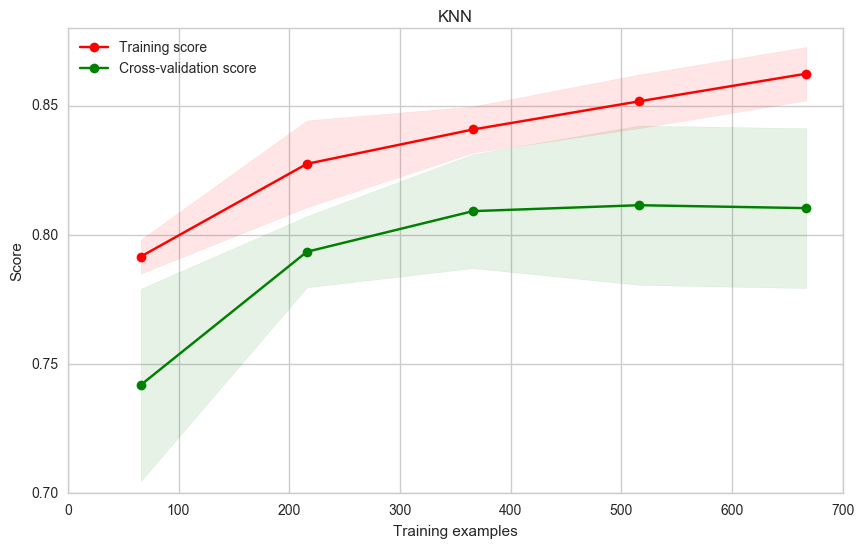

In [50]:
print(clf_knn_trian.score(X_test, y_test))
print(clf_knn_trian)
plot_learning_curve(clf_knn_trian, 'KNN', X, y, cv = 4)

In [62]:
clf_knn_trian.fit(X, y)
clf_knn = clf_knn_trian

In [93]:
externals.joblib.dump(clf_knn, 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl')

['D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_01.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_02.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_03.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_04.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_05.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_06.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_07.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_08.npy',
 'D:/Jupyter/kaggle/Titanic/clf/clf_knn.pkl_09.npy']

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=1031, oob_score=True, min_samples_split=5)
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [100, 300, 500]}

clf_rfc_train = get_model(RFC, parameters, X_train, y_train)

0.80269058296
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=1031, verbose=0, warm_start=False)


<module 'matplotlib.pyplot' from 'D:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

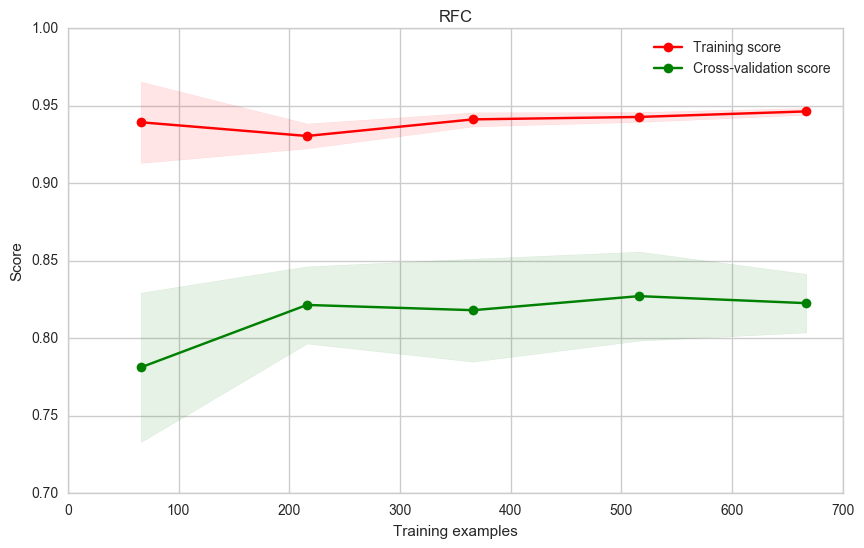

In [79]:
print(clf_rfc_train.score(X_test, y_test))
print(clf_rfc_train)
plot_learning_curve(clf_rfc_train, 'RFC', X, y, cv = 4)

In [80]:
clf_rfc_train.fit(X, y)
clf_rfc = clf_rfc_train
print clf_rfc.oob_score_

0.830527497194


[ 0.00028152  0.00134645  0.00143465  0.00249855  0.00589885  0.00637416
  0.00654929  0.00889086  0.00904867  0.00946986  0.01070858  0.01176487
  0.01235307  0.0140747   0.01683888  0.01854379  0.01975968  0.02193318
  0.0222034   0.02855959  0.03032726  0.03190847  0.03248286  0.04297476
  0.11175533  0.11590923  0.18386664  0.22224285]


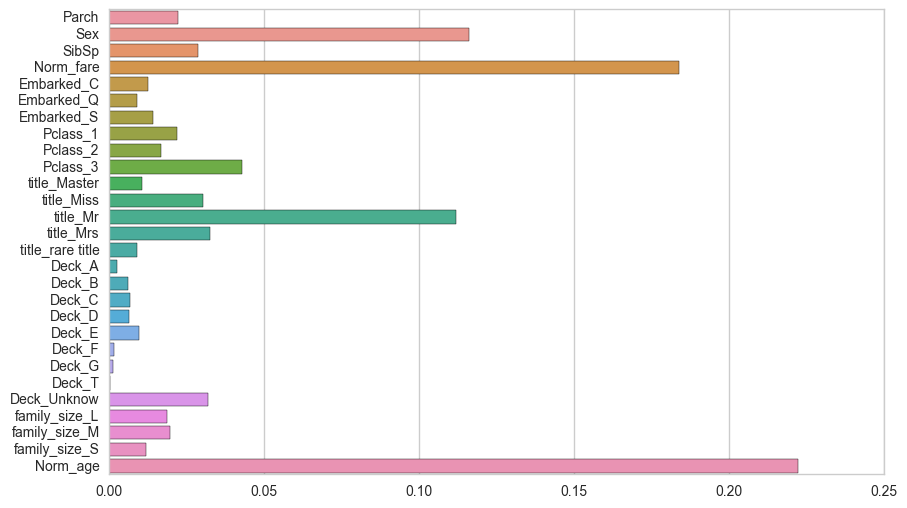

In [81]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(clf_rfc.feature_importances_, X.columns)
print(np.sort(clf_rfc.feature_importances_))

In [82]:
cols = X.columns[clf_rfc.feature_importances_ > 0.01]

In [83]:
parameters = {'criterion': ['entropy'], 'n_estimators': [300]}

clf_rfc_train2 = get_model(RFC, parameters, X_train[cols], y_train)

0.798206278027
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=1031, verbose=0, warm_start=False)


<module 'matplotlib.pyplot' from 'D:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

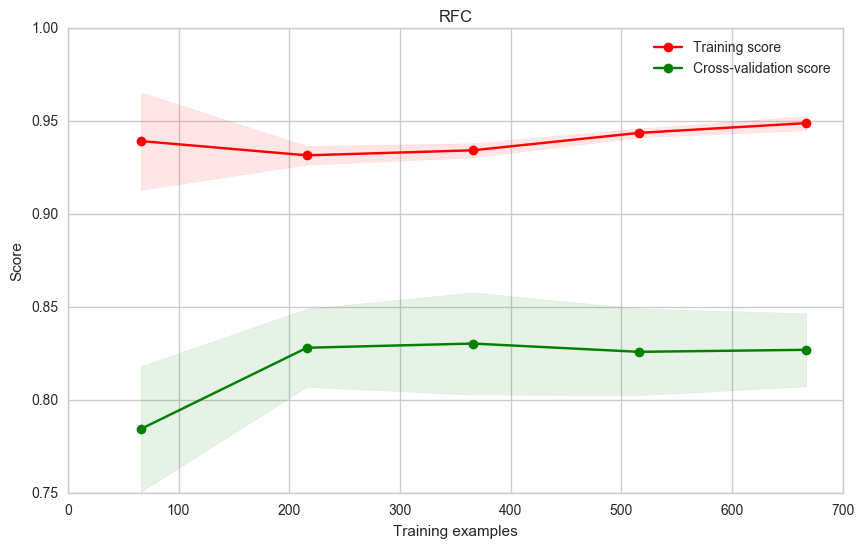

In [84]:
print(clf_rfc_train2.score(X_test[cols], y_test))
print(clf_rfc_train2)
plot_learning_curve(clf_rfc_train2, 'RFC', X[cols], y, cv = 4)

In [88]:
clf_rfc_train2.fit(X[cols], y)
clf_rfc2 = clf_rfc_train2
print clf_rfc2.oob_score_

0.826038159371


In [94]:
externals.joblib.dump(clf_rfc, 'clf/clf_rfc.pkl')

['clf/clf_rfc.pkl',
 'clf/clf_rfc.pkl_01.npy',
 'clf/clf_rfc.pkl_02.npy',
 'clf/clf_rfc.pkl_03.npy',
 'clf/clf_rfc.pkl_04.npy',
 'clf/clf_rfc.pkl_05.npy',
 'clf/clf_rfc.pkl_06.npy',
 'clf/clf_rfc.pkl_07.npy',
 'clf/clf_rfc.pkl_08.npy',
 'clf/clf_rfc.pkl_09.npy',
 'clf/clf_rfc.pkl_10.npy',
 'clf/clf_rfc.pkl_11.npy',
 'clf/clf_rfc.pkl_12.npy',
 'clf/clf_rfc.pkl_13.npy',
 'clf/clf_rfc.pkl_14.npy',
 'clf/clf_rfc.pkl_15.npy',
 'clf/clf_rfc.pkl_16.npy',
 'clf/clf_rfc.pkl_17.npy',
 'clf/clf_rfc.pkl_18.npy',
 'clf/clf_rfc.pkl_19.npy',
 'clf/clf_rfc.pkl_20.npy',
 'clf/clf_rfc.pkl_21.npy',
 'clf/clf_rfc.pkl_22.npy',
 'clf/clf_rfc.pkl_23.npy',
 'clf/clf_rfc.pkl_24.npy',
 'clf/clf_rfc.pkl_25.npy',
 'clf/clf_rfc.pkl_26.npy',
 'clf/clf_rfc.pkl_27.npy',
 'clf/clf_rfc.pkl_28.npy',
 'clf/clf_rfc.pkl_29.npy',
 'clf/clf_rfc.pkl_30.npy',
 'clf/clf_rfc.pkl_31.npy',
 'clf/clf_rfc.pkl_32.npy',
 'clf/clf_rfc.pkl_33.npy',
 'clf/clf_rfc.pkl_34.npy',
 'clf/clf_rfc.pkl_35.npy',
 'clf/clf_rfc.pkl_36.npy',
 'clf/cl